### Imports

In [213]:
from tqdm import tqdm
from utils.utils import *

import networkx as nx
import numpy as np
import pandas as pd
import os
import sys

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.31 ms (started: 2023-05-29 23:20:45 -05:00)


### Parameters

In [214]:
import json
  
# Opening JSON file
file = open("parameters.json")
params = json.load(file)

dir = os.path.dirname(os.getcwd())
print(dir)

group = params["group"][params["group_idx"]]
print("Group:\t\t", group)

/home/ealvarez/Project/GNN_Filter
Group:		 ['pck1^', 2]
time: 2.21 ms (started: 2023-05-29 23:20:46 -05:00)


### Load dataset

In [215]:
# Load dataset
df_process = pd.read_excel("{}/input/Edwin_proyecto2/Edwin_Set2-processed.xlsx".format(dir), header=0, sheet_name=0)
print(df_process.shape)
df_process

(460, 90)


,Set,Cluster,ID,ionMz,Label,59.0137,71.0139,74.0249,85.0296,87.0086,...,521.984,545.3994,604.0696,606.0744,611.144,664.117,665.2139,766.1076,784.1495,808.118
0,A,WT,1,0001 / zwf1^ 3.4,zwf1^,53182,641,5734,1042,1294,...,23348,6988,64597,114975,7538,4107,3095,3877,2040,3349
1,A,WT,2,0002 / zwf1^ 3.4,zwf1^,57902,1767,2889,1228,1531,...,26203,5613,75636,131864,8365,4607,4145,5541,2816,6021
2,A,WT,3,0003 / zwf1^ 3.4,zwf1^,51861,491,3540,1054,2448,...,22678,6304,64496,114834,7459,4293,3090,3279,1465,5946
3,A,WT,4,0004 / zwf1^ 3.4,zwf1^,62812,1648,6611,914,2578,...,25871,7033,76118,137734,6667,6285,4698,4961,2726,7357
4,A,WT,5,0005 / zwf1^ 3.4,zwf1^,54291,1525,3965,872,1812,...,22464,6646,67845,121045,8957,5474,4182,5072,2647,5559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,B,WT,2184,184 / zwf1-,zwf1^,181058,34300,94410,53978,17378,...,265074,142165,611985,1253220,41901,312792,13867,23979,23604,52350
456,B,WT,2185,185 / zwf1-,zwf1^,133247,35946,91914,66589,20837,...,235053,129635,575883,1157148,41314,302833,12741,21145,22037,54274
457,B,WT,2186,186 / zwf1-,zwf1^,156753,34937,90135,58742,19972,...,272005,143109,626983,1295456,44074,327254,14620,24958,22242,57179
458,B,WT,2187,187 / zwf1-,zwf1^,192830,31011,88636,48706,16375,...,234966,136943,595416,1208533,34467,317512,12937,22864,20562,54420


time: 449 ms (started: 2023-05-29 23:20:46 -05:00)


In [216]:
df_process.drop(["Set", "Cluster", "ID", "Label"], inplace=True, axis=1)
df_process

,ionMz,59.0137,71.0139,74.0249,85.0296,87.0086,88.0405,89.0245,101.0243,102.0562,...,521.984,545.3994,604.0696,606.0744,611.144,664.117,665.2139,766.1076,784.1495,808.118
0,0001 / zwf1^ 3.4,53182,641,5734,1042,1294,1940,2755,902,1260,...,23348,6988,64597,114975,7538,4107,3095,3877,2040,3349
1,0002 / zwf1^ 3.4,57902,1767,2889,1228,1531,990,2511,606,1105,...,26203,5613,75636,131864,8365,4607,4145,5541,2816,6021
2,0003 / zwf1^ 3.4,51861,491,3540,1054,2448,1928,1608,677,1154,...,22678,6304,64496,114834,7459,4293,3090,3279,1465,5946
3,0004 / zwf1^ 3.4,62812,1648,6611,914,2578,1633,2480,581,1096,...,25871,7033,76118,137734,6667,6285,4698,4961,2726,7357
4,0005 / zwf1^ 3.4,54291,1525,3965,872,1812,1348,2306,1630,803,...,22464,6646,67845,121045,8957,5474,4182,5072,2647,5559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,184 / zwf1-,181058,34300,94410,53978,17378,26847,58738,21390,40141,...,265074,142165,611985,1253220,41901,312792,13867,23979,23604,52350
456,185 / zwf1-,133247,35946,91914,66589,20837,35502,81753,22785,48479,...,235053,129635,575883,1157148,41314,302833,12741,21145,22037,54274
457,186 / zwf1-,156753,34937,90135,58742,19972,35555,73766,25427,41248,...,272005,143109,626983,1295456,44074,327254,14620,24958,22242,57179
458,187 / zwf1-,192830,31011,88636,48706,16375,23797,52303,24101,28432,...,234966,136943,595416,1208533,34467,317512,12937,22864,20562,54420


time: 21.2 ms (started: 2023-05-29 23:20:46 -05:00)


In [217]:
df_process.set_index("ionMz", inplace=True)
df_process.head()

,59.0137,71.0139,74.0249,85.0296,87.0086,88.0405,89.0245,101.0243,102.0562,109.0407,...,521.9840,545.3994,604.0696,606.0744,611.1440,664.1170,665.2139,766.1076,784.1495,808.1180
ionMz,,,,,,,,,,,,,,,,,,,,,
0001 / zwf1^ 3.4,53182,641,5734,1042,1294,1940,2755,902,1260,4804,...,23348,6988,64597,114975,7538,4107,3095,3877,2040,3349
0002 / zwf1^ 3.4,57902,1767,2889,1228,1531,990,2511,606,1105,2865,...,26203,5613,75636,131864,8365,4607,4145,5541,2816,6021
0003 / zwf1^ 3.4,51861,491,3540,1054,2448,1928,1608,677,1154,2347,...,22678,6304,64496,114834,7459,4293,3090,3279,1465,5946
0004 / zwf1^ 3.4,62812,1648,6611,914,2578,1633,2480,581,1096,4227,...,25871,7033,76118,137734,6667,6285,4698,4961,2726,7357
0005 / zwf1^ 3.4,54291,1525,3965,872,1812,1348,2306,1630,803,2882,...,22464,6646,67845,121045,8957,5474,4182,5072,2647,5559


time: 19.7 ms (started: 2023-05-29 23:20:46 -05:00)


In [218]:
# Split graph
groups = ["WT", "zwf1^", "pck1^"]

list_raw = []
for group in groups:
  list_raw.append(df_process.filter(like=group, axis=0))
list_raw[0]

,59.0137,71.0139,74.0249,85.0296,87.0086,88.0405,89.0245,101.0243,102.0562,109.0407,...,521.9840,545.3994,604.0696,606.0744,611.1440,664.1170,665.2139,766.1076,784.1495,808.1180
ionMz,,,,,,,,,,,,,,,,,,,,,
0071 / WT 2.2,56523,1438,3904,1167,1646,1008,2265,1068,757,2504,...,17082,7826,21390,95664,9169,6184,3014,4161,2455,4679
0072 / WT 2.2,24625,570,1531,518,1068,598,1401,866,507,1730,...,10087,5536,11066,44221,3993,3181,2565,1987,1553,2701
0073 / WT 2.2,78586,577,2486,1260,1095,585,3965,1445,615,1900,...,21099,9408,24709,105252,9896,8580,5077,5141,2404,5618
0074 / WT 2.2,76559,1272,2501,1565,1673,1085,2718,1243,483,2591,...,21910,8717,22982,103328,10482,6189,3498,5228,3433,5782
0075 / WT 2.2,67449,1060,2557,1345,1596,1293,2496,1226,267,2298,...,22226,9082,23236,105020,9024,6370,3947,4743,1996,5418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124 / WT,552888,42277,48251,66352,17530,20017,86977,20918,17626,49736,...,72636,24601,178424,293977,28675,113958,8240,2001,6038,7192
125 / WT,548340,36847,47041,64482,16471,17924,71080,16969,15791,48134,...,60481,20943,167246,265600,25479,101004,8055,2981,4781,6491
126 / WT,493758,40229,43139,68411,14856,18407,78105,23903,17651,51417,...,70685,26444,184251,285629,30594,109009,8336,3690,4748,8770


time: 24.9 ms (started: 2023-05-29 23:20:46 -05:00)


In [219]:
# Logarithm
list_raw_log = []

for item in list_raw:
  df_raw_log = item.copy()
  for column in df_raw_log.columns:
    df_raw_log[column] = np.log10(df_raw_log[column])
  list_raw_log.append(df_raw_log)
list_raw_log[0]

,59.0137,71.0139,74.0249,85.0296,87.0086,88.0405,89.0245,101.0243,102.0562,109.0407,...,521.9840,545.3994,604.0696,606.0744,611.1440,664.1170,665.2139,766.1076,784.1495,808.1180
ionMz,,,,,,,,,,,,,,,,,,,,,
0071 / WT 2.2,4.752225,3.157759,3.591510,3.067071,3.216430,3.003461,3.355068,3.028571,2.879096,3.398634,...,4.232539,3.893540,4.330211,4.980749,3.962322,3.791269,3.479143,3.619198,3.390051,3.670153
0072 / WT 2.2,4.391376,2.755875,3.184975,2.714330,3.028571,2.776701,3.146438,2.937518,2.705008,3.238046,...,4.003762,3.743196,4.043991,4.645629,3.601299,3.502564,3.409087,3.298198,3.191171,3.431525
0073 / WT 2.2,4.895345,2.761176,3.395501,3.100371,3.039414,2.767156,3.598243,3.159868,2.788875,3.278754,...,4.324262,3.973497,4.392855,5.022230,3.995460,3.933487,3.705607,3.711048,3.380934,3.749582
0074 / WT 2.2,4.883996,3.104487,3.398114,3.194514,3.223496,3.035430,3.434249,3.094471,2.683947,3.413467,...,4.340642,3.940367,4.361388,5.014218,4.020444,3.791620,3.543820,3.718336,3.535674,3.762078
0075 / WT 2.2,4.828976,3.025306,3.407731,3.128722,3.203033,3.111599,3.397245,3.088490,2.426511,3.361350,...,4.346861,3.958181,4.366161,5.021272,3.955399,3.804139,3.596267,3.676053,3.300161,3.733839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124 / WT,5.742637,4.626104,4.683506,4.821854,4.243782,4.301399,4.939404,4.320520,4.246154,4.696671,...,4.861152,4.390953,5.251453,5.468313,4.457503,5.056745,3.915927,3.301247,3.780893,3.856850
125 / WT,5.739050,4.566402,4.672477,4.809438,4.216720,4.253435,4.851747,4.229656,4.198410,4.682452,...,4.781619,4.321039,5.223356,5.424228,4.406182,5.004339,3.906066,3.474362,3.679519,3.812312
126 / WT,5.693514,4.604539,4.634870,4.835126,4.171902,4.264983,4.892679,4.378452,4.246769,4.711107,...,4.849327,4.422327,5.265410,5.455802,4.485636,5.037462,3.920958,3.567026,3.676511,3.943000


time: 85.9 ms (started: 2023-05-29 23:20:47 -05:00)


In [220]:
list_raw_log[2]

,59.0137,71.0139,74.0249,85.0296,87.0086,88.0405,89.0245,101.0243,102.0562,109.0407,...,521.9840,545.3994,604.0696,606.0744,611.1440,664.1170,665.2139,766.1076,784.1495,808.1180
ionMz,,,,,,,,,,,,,,,,,,,,,
0011 / pck1^ 2.4,4.531070,3.174932,3.578868,3.110253,3.451633,2.838849,3.292256,3.016197,2.853698,3.337260,...,4.236084,3.522705,4.638928,5.088271,3.943841,4.202407,3.681241,3.899875,3.662002,3.786325
0012 / pck1^ 2.4,4.353435,3.159266,3.355068,3.030195,3.167317,2.914343,3.289366,3.024075,2.891537,2.876218,...,4.102537,3.303196,4.519119,4.955178,3.830204,4.085148,3.549126,3.706974,3.579441,3.623766
0013 / pck1^ 2.4,4.559727,3.257679,3.608526,3.123525,3.403978,2.482874,3.478422,3.206826,2.938520,3.195900,...,4.268555,3.466719,4.671580,5.140781,3.976946,4.159778,3.585461,3.868821,3.630021,3.800648
0014 / pck1^ 2.4,4.481084,2.831230,3.532245,2.793790,2.991669,2.634477,3.319106,3.278982,2.281033,3.297323,...,4.172165,3.415641,4.556013,5.029700,3.893318,4.097535,3.501059,3.758230,3.648165,3.671728
0015 / pck1^ 2.4,4.542302,3.099335,3.614475,3.332236,3.211921,2.949878,3.301898,3.196453,3.095518,3.432007,...,4.248733,3.539954,4.616665,5.123018,4.026411,4.165274,3.660581,3.909342,3.495544,3.795115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0886 / pck1^ 2.3,4.749118,3.342028,4.014689,3.334454,3.554247,3.320562,3.530456,3.420616,3.209515,3.861833,...,4.427957,3.225568,4.683371,5.152970,4.072948,4.212108,3.504743,3.895588,3.810837,3.755570
0887 / pck1^ 2.3,4.783761,3.272538,4.073425,3.451633,3.552060,3.204120,3.672652,3.352761,3.440594,3.863442,...,4.419890,3.324488,4.705462,5.185202,4.086182,4.186448,3.582404,3.921218,3.558349,3.853029
0888 / pck1^ 2.3,4.809573,3.395326,4.162863,3.512151,3.602603,3.246991,3.481012,3.352183,2.969416,3.781181,...,4.450342,3.234011,4.710836,5.160948,4.044187,4.175338,3.684396,3.993921,3.618257,3.817301


time: 30.1 ms (started: 2023-05-29 23:20:47 -05:00)


In [221]:
# Correlation matrix

list_raw_corr = []
for df in tqdm(list_raw_log):
  matrix = df.corr(method="pearson") # pearson, kendall, spearman
  list_raw_corr.append(matrix)

print(len(list_raw_corr))
list_raw_corr[0]

100%|██████████| 3/3 [00:00<00:00, 210.01it/s]

3


,59.0137,71.0139,74.0249,85.0296,87.0086,88.0405,89.0245,101.0243,102.0562,109.0407,...,521.9840,545.3994,604.0696,606.0744,611.1440,664.1170,665.2139,766.1076,784.1495,808.1180
59.0137,1.000000,0.743432,0.787373,0.726726,0.790020,0.778377,0.666311,0.697456,0.754739,0.729770,...,0.732364,0.538804,0.820709,0.601603,0.662766,0.752682,0.572177,0.231086,0.605767,0.484607
71.0139,0.743432,1.000000,0.883508,0.957312,0.920295,0.854663,0.939022,0.928587,0.862819,0.803823,...,0.830114,0.450311,0.871367,0.689060,0.667594,0.736552,0.698557,0.268091,0.647934,0.626977
74.0249,0.787373,0.883508,1.000000,0.858732,0.869423,0.916430,0.797613,0.850930,0.950039,0.911959,...,0.894900,0.491770,0.871164,0.764727,0.761350,0.823213,0.768309,0.420684,0.753224,0.709097
85.0296,0.726726,0.957312,0.858732,1.000000,0.923370,0.828442,0.960521,0.932237,0.835201,0.782710,...,0.814085,0.486729,0.871482,0.678206,0.652058,0.723254,0.663542,0.230035,0.628755,0.629607
87.0086,0.790020,0.920295,0.869423,0.923370,1.000000,0.832983,0.900794,0.894396,0.840593,0.776935,...,0.829630,0.474566,0.882661,0.665814,0.653885,0.753822,0.670937,0.270392,0.650712,0.637334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664.1170,0.752682,0.736552,0.823213,0.723254,0.753822,0.832078,0.647112,0.708850,0.821012,0.863497,...,0.889808,0.682086,0.910668,0.879028,0.872336,1.000000,0.722720,0.585236,0.845552,0.744914
665.2139,0.572177,0.698557,0.768309,0.663542,0.670937,0.719964,0.645630,0.700056,0.750422,0.744676,...,0.814505,0.272238,0.756904,0.764351,0.717012,0.722720,1.000000,0.504753,0.748956,0.727987
766.1076,0.231086,0.268091,0.420684,0.230035,0.270392,0.440285,0.192273,0.274660,0.438213,0.507027,...,0.626646,0.469273,0.500801,0.692088,0.623734,0.585236,0.504753,1.000000,0.688681,0.670082
784.1495,0.605767,0.647934,0.753224,0.628755,0.650712,0.754856,0.571944,0.637196,0.766340,0.802557,...,0.878931,0.641301,0.822811,0.889192,0.854752,0.845552,0.748956,0.688681,1.000000,0.846432


time: 33.1 ms (started: 2023-05-29 23:20:47 -05:00)


In [222]:
# Build graph
list_graphs = []

threshold = 0.5

for matrix in tqdm(list_raw_corr):
  edges = build_graph_weight(matrix, threshold)

  # save
  weighted_edges = pd.DataFrame(edges, columns=["source", "target", "weight"])
  # weighted_edges.to_csv("{}/output_preprocessing/edges/{}_edges_{}.csv".format(dir, group[0], i), index=False)
  
  G = nx.from_pandas_edgelist(weighted_edges, "source", "target", edge_attr=["weight"])
  list_graphs.append(G)
list_graphs[0].number_of_nodes()

100%|██████████| 3/3 [00:00<00:00, 19.97it/s]


85

time: 158 ms (started: 2023-05-29 23:20:48 -05:00)


In [223]:
# Get common
H = get_subgraphs(list_graphs)


100%|██████████| 2/2 [00:00<00:00, 159.54it/s]

time: 33.1 ms (started: 2023-05-29 23:20:48 -05:00)


In [224]:
graph_detail(H)

Num. nodes: 75
Num. edges: 1074

time: 731 µs (started: 2023-05-29 23:20:48 -05:00)


In [225]:
# get weigth
df_edges_weight = pd.DataFrame(H.edges(), columns=["target", "source"])
df_edges_weight

,target,source
0,151.0403,184.0021
1,151.0403,117.0195
2,151.0403,259.0227
3,151.0403,129.0192
4,151.0403,109.0407
...,...,...
1069,323.0277,362.0509
1070,112.0518,211.0603
1071,249.0552,664.1170
1072,362.0509,664.1170


time: 14.8 ms (started: 2023-05-29 23:20:48 -05:00)


In [226]:
for k, graph in enumerate(list_graphs):
    graph_detail(graph)
    weight = []
    for raw in df_edges_weight.itertuples():
        weight.append(graph.get_edge_data(raw[1], raw[2])["weight"])

    df_edges_weight["weight{}".format(k + 1)] = weight
df_edges_weight

Num. nodes: 85
Num. edges: 3197

Num. nodes: 83
Num. edges: 1826

Num. nodes: 75
Num. edges: 1446



,target,source,weight1,weight2,weight3
0,151.0403,184.0021,0.726914,0.521068,0.604864
1,151.0403,117.0195,0.846037,0.633292,0.546067
2,151.0403,259.0227,0.776579,0.681804,0.531826
3,151.0403,129.0192,0.840475,0.643682,0.533658
4,151.0403,109.0407,0.863885,0.538536,0.560882
...,...,...,...,...,...
1069,323.0277,362.0509,0.911705,0.575817,0.845733
1070,112.0518,211.0603,0.660895,0.682342,0.517332
1071,249.0552,664.1170,0.828598,0.551524,0.613053
1072,362.0509,664.1170,0.911863,0.557420,0.886951


time: 19.5 ms (started: 2023-05-29 23:20:49 -05:00)


In [227]:
df_edges_weight["std"] = np.std(df_edges_weight.iloc[:, -len(groups):], axis=1, ddof=0)
df_edges_weight

,target,source,weight1,weight2,weight3,std
0,151.0403,184.0021,0.726914,0.521068,0.604864,0.084519
1,151.0403,117.0195,0.846037,0.633292,0.546067,0.125985
2,151.0403,259.0227,0.776579,0.681804,0.531826,0.100764
3,151.0403,129.0192,0.840475,0.643682,0.533658,0.126916
4,151.0403,109.0407,0.863885,0.538536,0.560882,0.148385
...,...,...,...,...,...,...
1069,323.0277,362.0509,0.911705,0.575817,0.845733,0.145307
1070,112.0518,211.0603,0.660895,0.682342,0.517332,0.073257
1071,249.0552,664.1170,0.828598,0.551524,0.613053,0.118797
1072,362.0509,664.1170,0.911863,0.557420,0.886951,0.161535


time: 19.4 ms (started: 2023-05-29 23:20:49 -05:00)


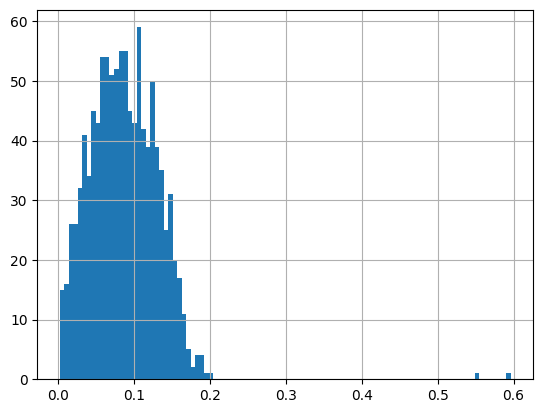

time: 184 ms (started: 2023-05-29 23:20:49 -05:00)


In [228]:
x = df_edges_weight["std"]

plt.hist(x, bins=100)
plt.grid()
plt.show()